# Title

autors: Bolzonello Enrico, Carlesso Daniel, Zordo Michele

## Dataset Setup

First we need the Padua street network, which we get from OpenStreetMap thanks to the Python library OSMnx

In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as cx

%matplotlib inline
ox.__version__

'1.7.1'

In [2]:
padova = ox.geocode_to_gdf(
    {
        "city": "Padova",
        "country": "Italy"
    }
)

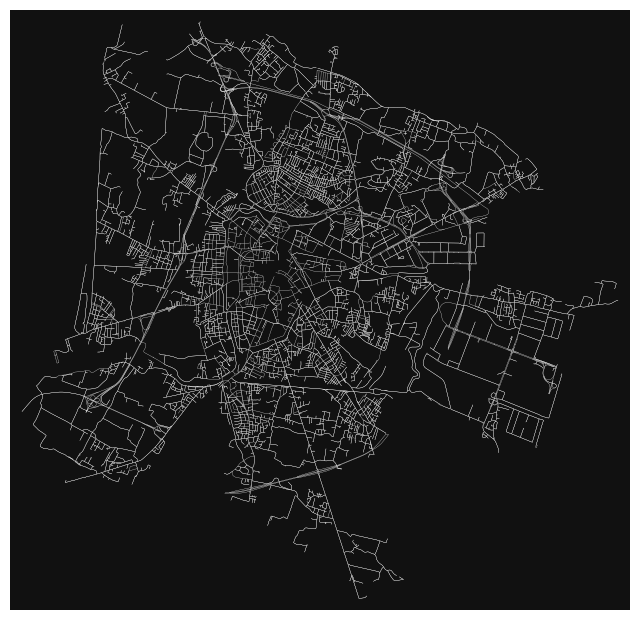

In [3]:
G_padova = ox.graph_from_place("Padova, Veneto, Italy", network_type="drive")
fig, ax = ox.plot_graph(G_padova, node_size=0, edge_color="w", node_color="r",edge_linewidth=0.2)

In [6]:
len(G_padova)

7069

The number of nodes for the Padua street network is too large, since complex interchanges and roundabouts form clusters of nodes where the real connection is essentialy only one. So the next step is to simplify the street network, assuming nodes at maximum 15 meters are the same intersection

In [8]:
G_proj = ox.project_graph(G_padova)
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G2)

3660